# Bagging, Boosting and Stacking


# Question 1: What is the fundamental idea behind ensemble techniques? How does bagging differ from boosting in terms of approach and objective?


The core idea behind *ensemble learning* is “Combine multiple weak or base learners to build a stronger, more accurate model.”

Instead of relying on one model, ensemble methods train several models and aggregate their predictions (by voting, averaging, or weighted combination).
This helps to:

* Reduce variance (i.e., avoid overfitting)
* Reduce bias (i.e., improve accuracy)
* Improve stability and robustness

Common ensemble methods: Bagging, Boosting, and Stacking.


 **Bagging (Bootstrap Aggregating)**

Approach:

* Multiple models (usually of the same type, like decision trees) are trained independently on different random subsets of the training data (drawn with replacement).
* Each model gives a prediction; the final output is the average (for regression) or majority vote (for classification) of all models.

Objective:

* Reduce variance and prevent overfitting.
* Each model is trained in parallel, so errors don’t influence each other.

Examples:

* Random Forest is a classic bagging-based algorithm.


**Boosting**

Approach:

* Models are trained sequentially — each new model focuses more on the errors (misclassified or high-residual samples) made by the previous models.
* Each model’s contribution is weighted according to its accuracy.

Objective:

* Reduce bias (make the model more accurate and powerful).
* Combines weak learners (e.g., shallow trees) into a strong learner by learning from previous mistakes.

Examples:

* AdaBoost, Gradient Boosting, XGBoost, CatBoost, LightGBM.



**Comparison Summary**

| Feature            | **Bagging**                     | **Boosting**                         |
| ------------------ | ------------------------------- | ------------------------------------ |
| Training Type      | Parallel (independent)          | Sequential (dependent)               |
| Goal               | Reduce variance             | Reduce bias                      |
| Data Sampling      | Random subsets with replacement | Full data with weighted samples      |
| Model Focus        | Equal importance                | Later models focus on earlier errors |
| Example Algorithms | Random Forest                   | AdaBoost, XGBoost, CatBoost          |
| Overfitting        | Less prone                      | Can overfit if too many iterations   |




# Question 2 :  Explain how the Random Forest Classifier reduces overfitting compared to a single decision tree. Mention the role of two key hyperparameters in this process.



### Why a single decision tree overfits

A single decision tree tends to:

* Learn the training data too precisely (high variance),
* Capture noise instead of true patterns,
* Perform poorly on unseen data (low generalization).

So while it fits the training data well, it often overfits.



### How Random Forest reduces overfitting

A random forest builds many decision trees and combines their outputs (majority vote or average).
It reduces overfitting mainly through two types of randomness:

1. Bootstrap sampling (bagging)

   * Each tree is trained on a random subset of the training data (sampled with replacement).
   * This ensures that no single tree sees the entire dataset, so models are less correlated.

2. Random feature selection

   * When splitting a node, the algorithm considers only a random subset of features instead of all features.
   * This prevents dominant features from driving all trees in the same way and further decorrelates the trees.

Finally, the forest’s ensemble prediction averages out the errors and noise of individual overfitted trees, giving a smoother and more generalizable model.



### Two key hyperparameters that help control overfitting

| Hyperparameter | Description                                        | Effect on overfitting                                                                                                              |
| -------------- | -------------------------------------------------- | ---------------------------------------------------------------------------------------------------------------------------------- |
| n_estimators   | Number of trees in the forest                      | More trees mean better averaging and lower variance (less overfitting), up to a point                                              |
| max_features   | Number of features randomly selected at each split | Smaller max_features adds more randomness and reduces correlation between trees, lowering overfitting; too small may increase bias |

---

### In summary

Random forest combats overfitting by introducing randomness in data (bagging) and randomness in feature selection, then averaging many uncorrelated trees to reduce variance.
The key hyperparameters controlling this are n_estimators and max_features.





# Question 3 : What is Stacking in ensemble learning? How does it differ from traditional bagging/boosting methods? Provide a simple example use case.

Stacking in ensemble learning is a technique where multiple different models (called base learners) are trained on the same dataset, and then another model (called a meta-learner or blender) is trained to combine their predictions.

the main idea is that instead of simply averaging or voting like in bagging, stacking learns how to best combine the outputs of different models using another learning algorithm.



### how stacking works

1. several base models are trained independently (for example, a decision tree, logistic regression, and random forest).
2. their predictions on the training data are collected and used as new input features.
3. a meta-model (for example, linear regression or xgboost) is trained on these predictions to make the final prediction.



### how it differs from bagging and boosting

| aspect             | bagging                       | boosting                                   | stacking                                                  |
| ------------------ | ----------------------------- | ------------------------------------------ | --------------------------------------------------------- |
| model type         | same type of base models      | same type, trained sequentially            | different types of base models                            |
| training style     | parallel (independent models) | sequential (each corrects previous errors) | parallel for base models, then a meta-model combines them |
| combination method | simple averaging or voting    | weighted combination based on performance  | learned combination using another model                   |
| main goal          | reduce variance               | reduce bias                                | capture strengths of diverse models                       |



### simple example use case

in a credit risk prediction problem, you could use:

* a logistic regression (good for linear patterns),
* a random forest (good for non-linear relationships), and
* a gradient boosting model (strong overall performer).

their predictions can be fed into a meta-model, such as logistic regression, which learns the optimal way to combine them to improve accuracy and generalization.



# Question 4 : What is the OOB Score in Random Forest, and why is it useful? How does it help in model evaluation without a separate validation set?

The OOB (out-of-bag) score in random forest is an internal cross-validation method that estimates model performance without needing a separate validation or test set.

### what is the OOB score

when building a random forest, each tree is trained on a **bootstrap sample** — a random subset of the training data chosen with replacement.
because of this sampling, roughly **one-third of the data is left out** of each tree’s training process.
these left-out samples are called **out-of-bag (oob) samples**.

the oob score is calculated by:

1. predicting the oob samples using the trees that did not see them during training, and
2. comparing these predictions with their true labels to compute accuracy (or another metric).



### why it is useful

* it provides an **unbiased estimate of model accuracy** without the need for a separate validation set.
* it helps **save data** for training, which is important when the dataset is small.
* it gives a quick way to assess model performance during training.



### How it helps in model evaluation

since every observation is left out of some trees, the random forest can use those unseen predictions to evaluate itself.
the average prediction performance on all oob samples serves as a **built-in validation score**, similar to cross-validation results.




# Question 5 : Compare AdaBoost and Gradient Boosting in terms of ● How they handle errors from weak learners ● Weight adjustment mechanism ● Typical use cases

here’s a clear comparison between adaboost and gradient boosting based on how they handle errors, adjust weights, and their typical use cases:



### 1. how they handle errors from weak learners

**adaboost:**

* focuses on misclassified samples by increasing their weights after each iteration.
* the next weak learner tries harder to correctly predict these difficult cases.
* it directly modifies the importance of samples based on classification errors.

**gradient boosting:**

* instead of adjusting sample weights, it fits the next model to the **residual errors** (the difference between predicted and actual values).
* each new weak learner is trained to minimize a **loss function** (for example, mse or log loss).
* it uses a gradient descent approach to reduce overall error step by step.



### 2. weight adjustment mechanism

**adaboost:**

* increases weights of incorrectly predicted samples and decreases weights of correctly predicted ones.
* assigns a coefficient (alpha) to each weak learner based on its accuracy.
* the final prediction is a weighted vote of all weak learners.

**gradient boosting:**

* does not explicitly change sample weights.
* instead, computes the gradient of the loss function and trains new learners to predict these gradients.
* combines all weak learners by adding their predictions with a learning rate to gradually improve performance.



### 3. typical use cases

**adaboost:**

* works well for relatively clean, simple datasets.
* often used with shallow decision trees (stumps).
* suitable for binary or multiclass classification problems (for example, spam detection, face recognition).

**gradient boosting:**

* more flexible and powerful for both regression and classification.
* can handle complex, noisy datasets with different loss functions.
* widely used in real-world applications such as credit scoring, sales forecasting, and ranking systems.



### summary table

| aspect             | adaboost                                       | gradient boosting                     |
| ------------------ | ---------------------------------------------- | ------------------------------------- |
| error handling     | focuses on misclassified samples               | fits new learners to residual errors  |
| weight adjustment  | changes sample weights                         | uses gradient of loss function        |
| main goal          | improve classification accuracy by reweighting | minimize overall loss using gradients |
| best suited for    | simple, clean datasets                         | complex or noisy datasets             |
| key algorithm type | weight-based boosting                          | gradient-based boosting               |




# Question 6 : Why does CatBoost perform well on categorical features without requiring extensive preprocessing? Briefly explain its handling of categorical variables.

catboost performs well on categorical features because it has a built-in, smart way of encoding categorical variables — it doesn’t need one-hot encoding or label encoding like other algorithms.


### how catboost handles categorical variables

1. **ordered target statistics (ordered encoding):**

   * instead of replacing categories with simple averages of the target (which can cause overfitting), catboost uses an **ordered approach**.
   * it calculates the target mean for each category **using only previous samples**, not the current one.
   * this prevents the model from "seeing the answer" during training, reducing target leakage and overfitting.

2. **combination of categorical features:**

   * catboost automatically creates **combinations of categorical features** to capture complex interactions.
   * this helps the model learn patterns that other algorithms might miss without manual feature engineering.

3. **efficient numeric transformation:**

   * the encoded categorical values are converted into numeric form internally so that catboost can handle them like continuous features in its decision trees.


### why this is useful

* no need for manual one-hot or label encoding.
* reduces overfitting caused by naive encoding.
* speeds up preprocessing and keeps feature space compact.
* works well even when there are many categorical variables or high-cardinality categories.





In [2]:
# Question 7: KNN Classifier Assignment: Wine Dataset Analysis with Optimization
# Task:
# 1. Load the Wine dataset (sklearn.datasets.load_wine()).
# 2. Split data into 70% train and 30% test.
# 3. Train a KNN classifier (default K=5) without scaling and evaluate using:
# a. Accuracy, b. Precision, Recall, F1-Score (print classification report)
# 4. Apply StandardScaler, retrain KNN, and compare metrics.
# 5. Use GridSearchCV to find the best K (test K=1 to 20) and distance metric
# (Euclidean, Manhattan).
# 6. Train the optimized KNN and compare results with the unscaled/scaled versions.


# KNN Classifier Assignment: Wine Dataset Analysis with Optimization

# Step 1: Import libraries
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 2: Load the Wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# Split data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Step 3: Train KNN without scaling (default K=5)
knn_default = KNeighborsClassifier(n_neighbors=5)
knn_default.fit(X_train, y_train)
y_pred_default = knn_default.predict(X_test)

print("=== KNN Without Scaling ===")
print("Accuracy:", accuracy_score(y_test, y_pred_default))
print("\nClassification Report:\n", classification_report(y_test, y_pred_default))

# Step 4: Apply StandardScaler and retrain KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)

print("\n=== KNN With Scaling (StandardScaler) ===")
print("Accuracy:", accuracy_score(y_test, y_pred_scaled))
print("\nClassification Report:\n", classification_report(y_test, y_pred_scaled))

# Step 5: Use GridSearchCV to find the best K and distance metric
param_grid = {
    'n_neighbors': range(1, 21),
    'metric': ['euclidean', 'manhattan']
}

grid_search = GridSearchCV(
    KNeighborsClassifier(),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid_search.fit(X_train_scaled, y_train)

print("\n=== Grid Search Results ===")
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Step 6: Train optimized KNN model
best_knn = grid_search.best_estimator_
y_pred_best = best_knn.predict(X_test_scaled)

print("\n=== Optimized KNN (After Grid Search) ===")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))

# Optional: Compare accuracies for summary
print("\n=== Accuracy Comparison ===")
print(f"Without Scaling: {accuracy_score(y_test, y_pred_default):.4f}")
print(f"With Scaling:    {accuracy_score(y_test, y_pred_scaled):.4f}")
print(f"Optimized KNN:   {accuracy_score(y_test, y_pred_best):.4f}")



=== KNN Without Scaling ===
Accuracy: 0.7222222222222222

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        18
           1       0.78      0.67      0.72        21
           2       0.50      0.60      0.55        15

    accuracy                           0.72        54
   macro avg       0.72      0.72      0.72        54
weighted avg       0.74      0.72      0.73        54


=== KNN With Scaling (StandardScaler) ===
Accuracy: 0.9444444444444444

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.86      0.92        21
           2       0.83      1.00      0.91        15

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.95      0.94      0.94        54


=== Grid Search Results ===
Best Parameters: {'metric': 'e

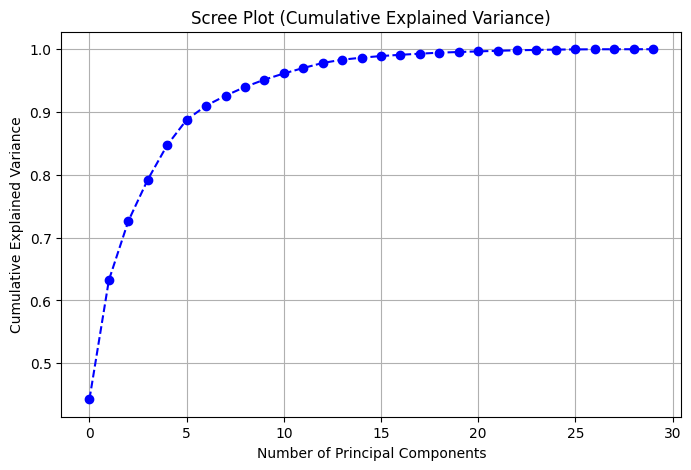

Number of components to retain 95% variance: 10

=== KNN Accuracy Comparison ===
Accuracy on Original Data:     0.9708
Accuracy on PCA (95%) Data:    0.9474


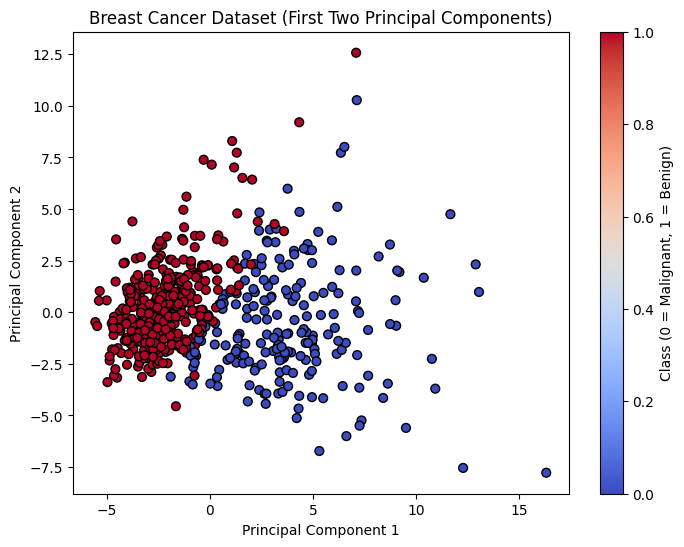

In [3]:
# Question 8: PCA + KNN with Variance Analysis and Visualization, Task:
#1. Load the Breast Cancer dataset (sklearn.datasets.load_breast_cancer()).
#2. Apply PCA and plot the scree plot (explained variance ratio).
#3. Retain 95% variance and transform the dataset.
#4. Train KNN on the original data and PCA-transformed data, then compare accuracy.
#5. Visualize the first two principal components using a scatter plot (color by class).


# PCA + KNN with Variance Analysis and Visualization

# Step 1: Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Step 2: Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Step 3: Standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Plot the scree plot (explained variance ratio)
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--', color='b')
plt.title('Scree Plot (Cumulative Explained Variance)')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# Step 5: Retain 95% variance and transform dataset
pca_95 = PCA(n_components=0.95)
X_pca_95 = pca_95.fit_transform(X_scaled)

print(f"Number of components to retain 95% variance: {pca_95.n_components_}")

# Step 6: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)
X_train_pca, X_test_pca, _, _ = train_test_split(
    X_pca_95, y, test_size=0.3, random_state=42, stratify=y
)

# Step 7: Train KNN on original data
knn_original = KNeighborsClassifier(n_neighbors=5)
knn_original.fit(X_train, y_train)
y_pred_original = knn_original.predict(X_test)
acc_original = accuracy_score(y_test, y_pred_original)

# Train KNN on PCA-transformed data
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)
acc_pca = accuracy_score(y_test, y_pred_pca)

# Step 8: Compare results
print("\n=== KNN Accuracy Comparison ===")
print(f"Accuracy on Original Data:     {acc_original:.4f}")
print(f"Accuracy on PCA (95%) Data:    {acc_pca:.4f}")

# Step 9: Visualize first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', edgecolor='k', s=40)
plt.title('Breast Cancer Dataset (First Two Principal Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Class (0 = Malignant, 1 = Benign)')
plt.show()


=== Comparison of Distance Metrics (K=5) ===
Mean Squared Error (Euclidean): 4989.2901
Mean Squared Error (Manhattan): 5558.4380


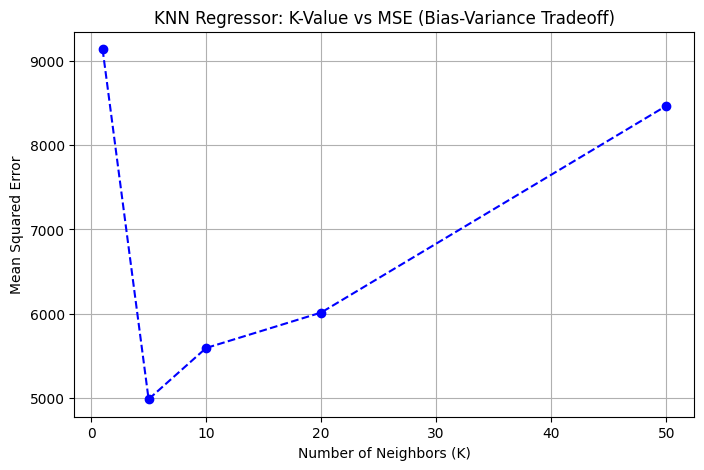

In [4]:
# Question 9: KNN Regressor with Distance Metrics and K-Value Analysis Task:
# 1. Generate a synthetic regression dataset (sklearn.datasets.make_regression(n_samples=500, n_features=10)).
# 2. Train a KNN regressor with: a. Euclidean distance (K=5) b. Manhattan distance (K=5) c. Compare Mean Squared Error (MSE) for both.
# 3. Test K=1, 5, 10, 20, 50 and plot K vs. MSE to analyze bias-variance tradeoff.

# KNN Regressor with Distance Metrics and K-Value Analysis

# Step 1: import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Step 2: generate synthetic regression dataset
X, y = make_regression(n_samples=500, n_features=10, noise=15, random_state=42)

# split into training and testing sets (70-30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# scale the data (important for distance-based models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3a: KNN regressor with Euclidean distance (K=5)
knn_euclidean = KNeighborsRegressor(n_neighbors=5, metric='euclidean')
knn_euclidean.fit(X_train_scaled, y_train)
y_pred_euclidean = knn_euclidean.predict(X_test_scaled)
mse_euclidean = mean_squared_error(y_test, y_pred_euclidean)

# Step 3b: KNN regressor with Manhattan distance (K=5)
knn_manhattan = KNeighborsRegressor(n_neighbors=5, metric='manhattan')
knn_manhattan.fit(X_train_scaled, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test_scaled)
mse_manhattan = mean_squared_error(y_test, y_pred_manhattan)

print("=== Comparison of Distance Metrics (K=5) ===")
print(f"Mean Squared Error (Euclidean): {mse_euclidean:.4f}")
print(f"Mean Squared Error (Manhattan): {mse_manhattan:.4f}")

# Step 4: analyze effect of K on performance (bias-variance tradeoff)
k_values = [1, 5, 10, 20, 50]
mse_values = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k, metric='euclidean')
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

# Step 5: plot K vs MSE
plt.figure(figsize=(8, 5))
plt.plot(k_values, mse_values, marker='o', linestyle='--', color='b')
plt.title("KNN Regressor: K-Value vs MSE (Bias-Variance Tradeoff)")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Mean Squared Error")
plt.grid(True)
plt.show()


=== BRUTE METHOD ===
Training Time: 0.0052 sec
Accuracy: 0.7359
              precision    recall  f1-score   support

         0.0       0.77      0.85      0.81       150
         1.0       0.65      0.53      0.59        81

    accuracy                           0.74       231
   macro avg       0.71      0.69      0.70       231
weighted avg       0.73      0.74      0.73       231

=== KD_TREE METHOD ===
Training Time: 0.0086 sec
Accuracy: 0.7359
              precision    recall  f1-score   support

         0.0       0.77      0.85      0.81       150
         1.0       0.65      0.53      0.59        81

    accuracy                           0.74       231
   macro avg       0.71      0.69      0.70       231
weighted avg       0.73      0.74      0.73       231

=== BALL_TREE METHOD ===
Training Time: 0.0077 sec
Accuracy: 0.7359
              precision    recall  f1-score   support

         0.0       0.77      0.85      0.81       150
         1.0       0.65      0.53      

<Figure size 800x600 with 0 Axes>

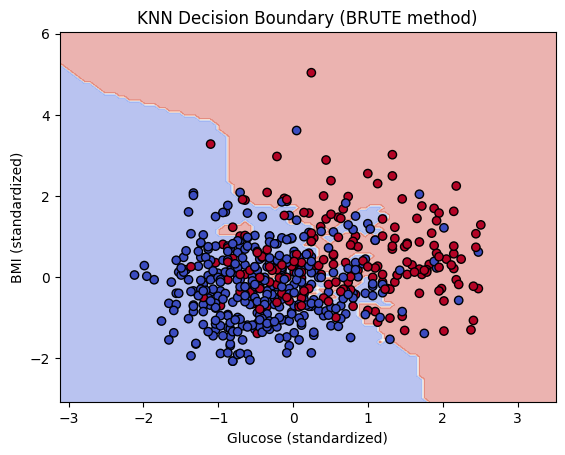

In [5]:
# Question 10 : KNN with KD-Tree/Ball Tree, Imputation, and Real-World Data Task:
# 1. Load the Pima Indians Diabetes dataset (contains missing values).
# 2. Use KNN Imputation (sklearn.impute.KNNImputer) to fill missing values.
# 3. Train KNN using:a. Brute-force method, b. KD-Tree, c. Ball Tree
# 4. Compare their training time and accuracy.
# 5. Plot the decision boundary for the best-performing method (use 2 most important features).
# Dataset: Pima Indians Diabetes

# KNN with KD-Tree/Ball Tree, Imputation, and Real-World Data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.inspection import DecisionBoundaryDisplay

# Step 1: Load the Pima Indians Diabetes dataset
# (you can replace the path with your local file if needed)
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = [
    "Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
    "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"
]
data = pd.read_csv(url, names=columns)

# Step 2: Handle missing values
# In this dataset, zeros in certain columns represent missing values.
cols_with_missing = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
data[cols_with_missing] = data[cols_with_missing].replace(0, np.nan)

# Apply KNN imputation
imputer = KNNImputer(n_neighbors=5)
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=columns)

# Step 3: Split into features and target
X = data_imputed.drop("Outcome", axis=1)
y = data_imputed["Outcome"]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

# Step 4: Train KNN with different algorithms and compare performance
methods = ["brute", "kd_tree", "ball_tree"]
results = {}

for method in methods:
    knn = KNeighborsClassifier(n_neighbors=5, algorithm=method)
    start_time = time.time()
    knn.fit(X_train, y_train)
    train_time = time.time() - start_time
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[method] = {"accuracy": acc, "time": train_time}
    print(f"=== {method.upper()} METHOD ===")
    print(f"Training Time: {train_time:.4f} sec")
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))

# Step 5: Compare results
print("\n=== COMPARISON SUMMARY ===")
for method, result in results.items():
    print(f"{method:10s} | Accuracy: {result['accuracy']:.4f} | Training Time: {result['time']:.4f} sec")

# Identify best method
best_method = max(results, key=lambda m: results[m]["accuracy"])
print(f"\nBest Performing Method: {best_method.upper()}")

# Step 6: Plot decision boundary using two most important features
# (here we’ll use 'Glucose' and 'BMI' as they are strong predictors)
feature_idx = [1, 5]  # Glucose, BMI
X_two_features = X_scaled[:, feature_idx]

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
    X_two_features, y, test_size=0.3, random_state=42, stratify=y
)

best_knn = KNeighborsClassifier(n_neighbors=5, algorithm=best_method)
best_knn.fit(X_train_2, y_train_2)

plt.figure(figsize=(8, 6))
disp = DecisionBoundaryDisplay.from_estimator(
    best_knn,
    X_train_2,
    response_method="predict",
    cmap="coolwarm",
    alpha=0.4
)
plt.scatter(X_train_2[:, 0], X_train_2[:, 1], c=y_train_2, cmap="coolwarm", edgecolor="k")
plt.title(f"KNN Decision Boundary ({best_method.upper()} method)")
plt.xlabel("Glucose (standardized)")
plt.ylabel("BMI (standardized)")
plt.show()
